# Kalman Filtering

In [20]:
import Simulator
import Observation
import Statistics

import KalmanFilter
import ETKalmanFilter
import SLETKalmanFilter
import IEWParticleFilter

import numpy as np

## Loading simulator 

For Kalman filtering we have to be able to propagate a Gaussian distribution in time and to have access to the linear operators

In [29]:
timestamp = "2021_08_26-12_22_18"

grid, simulator = Simulator.from_file(timestamp)

## Definition of initial distribution 

The inital state is equipped with a Gaussian distribution specified by its mean and covariance. 

In [3]:
true_statistics = Statistics.Statistics(simulator, 1)

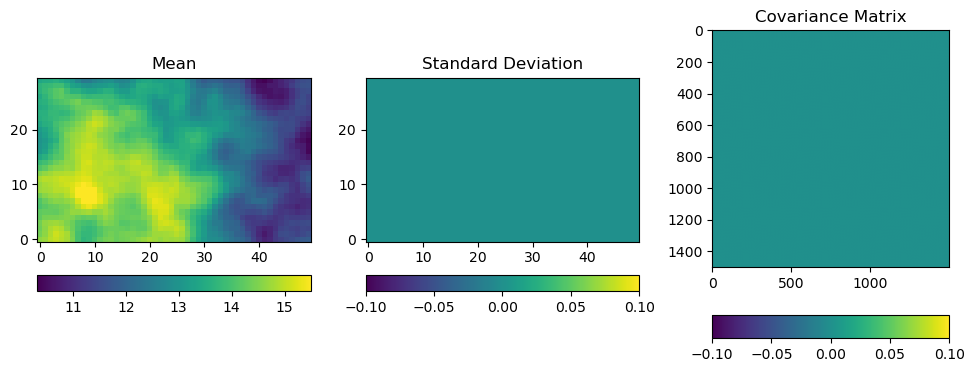

In [4]:
prior_args = Statistics.prior_args_from_file(timestamp)
true_statistics.set_prior(prior_args)

true_statistics.plot()

## Loading observations 

Observation positions which are fixed for a setup and values from the truth

In [5]:
observation = Observation.from_file(grid, timestamp)

Remember to set observation positions and to set/observe values!


# Coverage experiments

In [ ]:
trials = 250

## Repeated KF experiments

In [7]:
coverageKF = np.zeros(grid.N_x)

for s in range(trials):
    print("Experiment ", s)
    
    # Generate new observations of a new truth
    observation.clear_observations()

    true_statistics = Statistics.Statistics(simulator, 1)
    true_statistics.set_prior(prior_args)
    true_statistics.propagate(nt=25)
    truth = true_statistics.mean
    observation.observe(true_statistics.mean)

    # Data assimilation for the new observations
    statistics = Statistics.Statistics(simulator)
    statistics.set_prior(prior_args)
    kalmanFilter = KalmanFilter.Kalman(statistics, observation)

    statistics.propagate(25)
    kalmanFilter.filter(statistics.mean, statistics.cov, observation.obses[0])

    coverageKF = coverageKF + np.all([(truth < statistics.mean + 1.64*statistics.stddev), (truth > statistics.mean - 1.64*statistics.stddev)], axis=0)*1/trials

Experiment  0
Please remember to set priors!
Experiment  1
Please remember to set priors!
Experiment  2
Please remember to set priors!
Experiment  3
Please remember to set priors!
Experiment  4
Please remember to set priors!
Experiment  5
Please remember to set priors!
Experiment  6
Please remember to set priors!
Experiment  7
Please remember to set priors!
Experiment  8
Please remember to set priors!
Experiment  9
Please remember to set priors!
Experiment  10
Please remember to set priors!
Experiment  11
Please remember to set priors!
Experiment  12
Please remember to set priors!
Experiment  13
Please remember to set priors!
Experiment  14
Please remember to set priors!
Experiment  15
Please remember to set priors!
Experiment  16
Please remember to set priors!
Experiment  17
Please remember to set priors!
Experiment  18
Please remember to set priors!
Experiment  19
Please remember to set priors!
Experiment  20
Please remember to set priors!
Experiment  21
Please remember to set priors

## Repeated ETKF experiments

In [9]:
coverageETKF = np.zeros(grid.N_x)

for s in range(trials):
    print("Experiment ", s)
    
    # Generate new observations of a new truth
    observation.clear_observations()

    true_statistics = Statistics.Statistics(simulator, 1)
    true_statistics.set_prior(prior_args)
    true_statistics.propagate(nt=25)
    truth = true_statistics.mean
    observation.observe(true_statistics.mean)

    # Data assimilation for the new observations
    statistics = Statistics.Statistics(simulator, 100)
    statistics.set_prior(prior_args)
    etkFilter = ETKalmanFilter.ETKalman(statistics, observation)

    statistics.propagate(25)
    etkFilter.filter(statistics.ensemble.ensemble, observation.obses[0])

    coverageETKF = coverageETKF + np.all([(truth < statistics.mean + 1.64*statistics.stddev), (truth > statistics.mean - 1.64*statistics.stddev)], axis=0)*1/trials

Experiment  0
Experiment  1
Experiment  2
Experiment  3
Experiment  4
Experiment  5
Experiment  6
Experiment  7
Experiment  8
Experiment  9
Experiment  10
Experiment  11
Experiment  12
Experiment  13
Experiment  14
Experiment  15
Experiment  16
Experiment  17
Experiment  18
Experiment  19
Experiment  20
Experiment  21
Experiment  22
Experiment  23
Experiment  24
Experiment  25
Experiment  26
Experiment  27
Experiment  28
Experiment  29
Experiment  30
Experiment  31
Experiment  32
Experiment  33
Experiment  34
Experiment  35
Experiment  36
Experiment  37
Experiment  38
Experiment  39
Experiment  40
Experiment  41
Experiment  42
Experiment  43
Experiment  44
Experiment  45
Experiment  46
Experiment  47
Experiment  48
Experiment  49
Experiment  50
Experiment  51
Experiment  52
Experiment  53
Experiment  54
Experiment  55
Experiment  56
Experiment  57
Experiment  58
Experiment  59
Experiment  60
Experiment  61
Experiment  62
Experiment  63
Experiment  64
Experiment  65
Experiment  66
Exper

## Repeated LETKF experiments

In [11]:
coverageSLETKF = np.zeros(grid.N_x)

for s in range(trials):
    print("Experiment ", s)
    
    # Generate new observations of a new truth
    observation.clear_observations()

    true_statistics = Statistics.Statistics(simulator, 1)
    true_statistics.set_prior(prior_args)
    true_statistics.propagate(nt=25)
    truth = true_statistics.mean
    observation.observe(true_statistics.mean)

    # Data assimilation for the new observations
    statistics = Statistics.Statistics(simulator, 100)
    statistics.set_prior(prior_args)
    sletkFilter = SLETKalmanFilter.SLETKalman(statistics, observation, 8)

    statistics.propagate(25)
    sletkFilter.filter(statistics.ensemble.ensemble, observation.obses[0])

    coverageSLETKF = coverageSLETKF + np.all([(truth < statistics.mean + 1.64*statistics.stddev), (truth > statistics.mean - 1.64*statistics.stddev)], axis=0)*1/trials

Experiment  0
Experiment  1
Experiment  2
Experiment  3
Experiment  4
Experiment  5
Experiment  6
Experiment  7
Experiment  8
Experiment  9
Experiment  10
Experiment  11
Experiment  12
Experiment  13
Experiment  14
Experiment  15
Experiment  16
Experiment  17
Experiment  18
Experiment  19
Experiment  20
Experiment  21
Experiment  22
Experiment  23
Experiment  24
Experiment  25
Experiment  26
Experiment  27
Experiment  28
Experiment  29
Experiment  30
Experiment  31
Experiment  32
Experiment  33
Experiment  34
Experiment  35
Experiment  36
Experiment  37
Experiment  38
Experiment  39
Experiment  40
Experiment  41
Experiment  42
Experiment  43
Experiment  44
Experiment  45
Experiment  46
Experiment  47
Experiment  48
Experiment  49
Experiment  50
Experiment  51
Experiment  52
Experiment  53
Experiment  54
Experiment  55
Experiment  56
Experiment  57
Experiment  58
Experiment  59
Experiment  60
Experiment  61
Experiment  62
Experiment  63
Experiment  64
Experiment  65
Experiment  66
Exper

## Repeated IEWPF experiments

In [21]:
coverageIEWPF = np.zeros(grid.N_x)

for s in range(trials):
    print("Experiment ", s)
    
    # Generate new observations of a new truth
    observation.clear_observations()

    true_statistics = Statistics.Statistics(simulator, 1)
    true_statistics.set_prior(prior_args)
    true_statistics.propagate(nt=25)
    truth = true_statistics.mean
    observation.observe(true_statistics.mean)

    # Data assimilation for the new observations
    statistics = Statistics.Statistics(simulator, 100)
    statistics.set_prior(prior_args)
    iewpFilter = IEWParticleFilter.IEWParticle(statistics, observation)

    statistics.propagate(25, model_error=False)
    iewpFilter.filter(statistics.ensemble.ensemble, observation.obses[0])

    coverageIEWPF = coverageIEWPF + np.all([(truth < statistics.mean + 1.64*statistics.stddev), (truth > statistics.mean - 1.64*statistics.stddev)], axis=0)*1/trials

Experiment  0
dummy only!
Experiment  1
dummy only!
Experiment  2
dummy only!
Experiment  3
dummy only!
Experiment  4
dummy only!
Experiment  5
dummy only!
Experiment  6
dummy only!
Experiment  7
dummy only!
Experiment  8
dummy only!
Experiment  9
dummy only!
Experiment  10
dummy only!
Experiment  11
dummy only!
Experiment  12
dummy only!
Experiment  13
dummy only!
Experiment  14
dummy only!
Experiment  15
dummy only!
Experiment  16
dummy only!
Experiment  17
dummy only!
Experiment  18
dummy only!
Experiment  19
dummy only!
Experiment  20
dummy only!
Experiment  21
dummy only!
Experiment  22
dummy only!
Experiment  23
dummy only!
Experiment  24
dummy only!
Experiment  25
dummy only!
Experiment  26
dummy only!
Experiment  27
dummy only!
Experiment  28
dummy only!
Experiment  29
dummy only!
Experiment  30
dummy only!
Experiment  31
dummy only!
Experiment  32
dummy only!
Experiment  33
dummy only!
Experiment  34
dummy only!
Experiment  35
dummy only!
Experiment  36
dummy only!
Experiment 

## Comparison

In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

fig = plt.figure(figsize=(12,4))

axs = AxesGrid(fig, (0.0,0.0,1.0,1.0), nrows_ncols=(1,4), axes_pad=0.1,
    cbar_mode="single", cbar_location="right", cbar_pad=0.1)

fig0 = axs[0].imshow(np.reshape(coverageKF,(grid.ny, grid.nx)), origin="lower", vmin=0.8, vmax=1.0, cmap="seismic")
axs[0].set_title("KF")

fig1 = axs[1].imshow(np.reshape(coverageETKF,(grid.ny, grid.nx)), origin="lower", vmin=0.8, vmax=1.0, cmap="seismic")
axs[1].set_title("ETKF")

fig2 = axs[2].imshow(np.reshape(coverageSLETKF,(grid.ny, grid.nx)), origin="lower", vmin=0.8, vmax=1.0, cmap="seismic")
axs[2].set_title("LETKF")

fig3 = axs[3].imshow(np.reshape(coverageIEWPF,(grid.ny, grid.nx)), origin="lower", vmin=0.8, vmax=1.0, cmap="seismic")
axs[3].set_title("IEWPF")

cbar = axs[0].cax.colorbar(fig0)

plt.show()